In [43]:
import pickle
from pathlib import Path
from constants import globals as g


activity = 'gallop'
participant_no = 3
PARENT_DIR = Path(g.PROJECT_DIR, "data", "grossmotor-pose-v2").__str__()
data = Path(PARENT_DIR, f"center-{participant_no}_{activity}_1_2.pkl").__str__()

with open(data, 'rb') as f: 
    pkl_data = pickle.load(f)

pkl_data['keypoint'].shape

(1, 30, 17, 2)

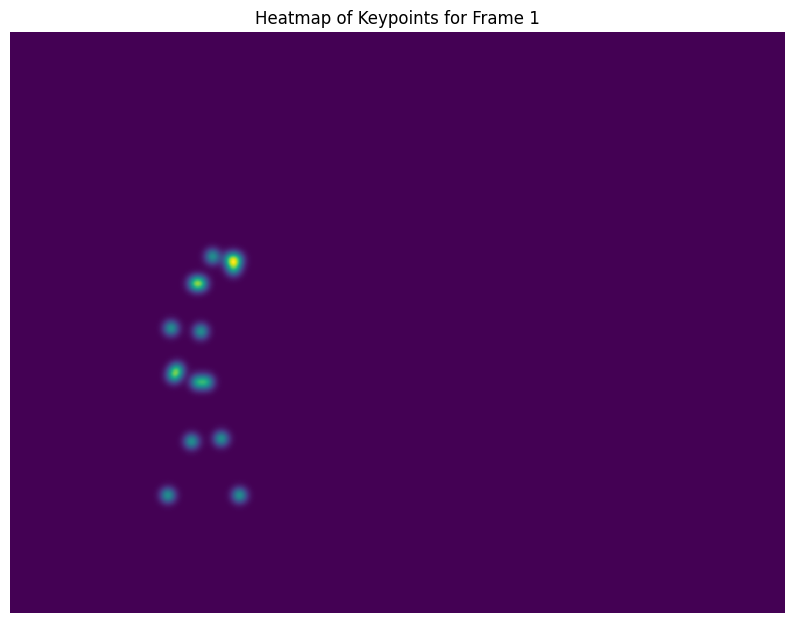

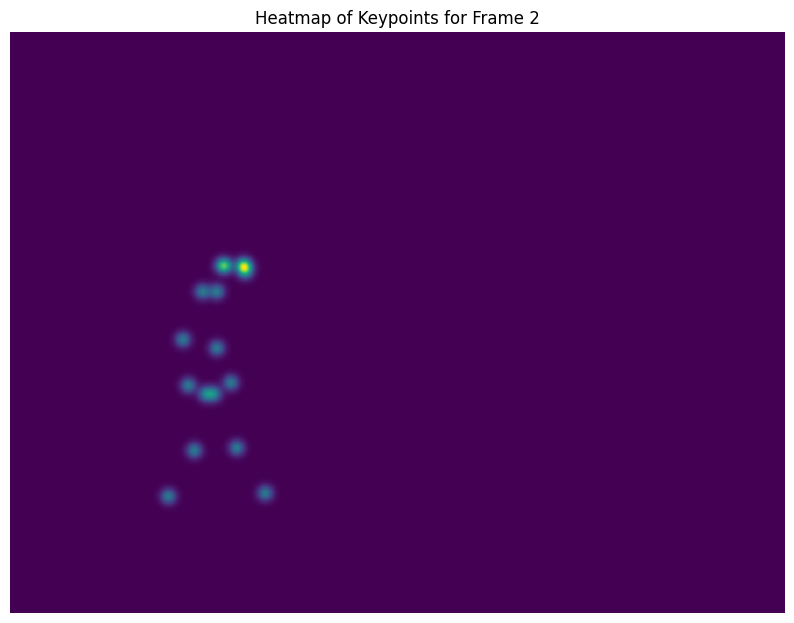

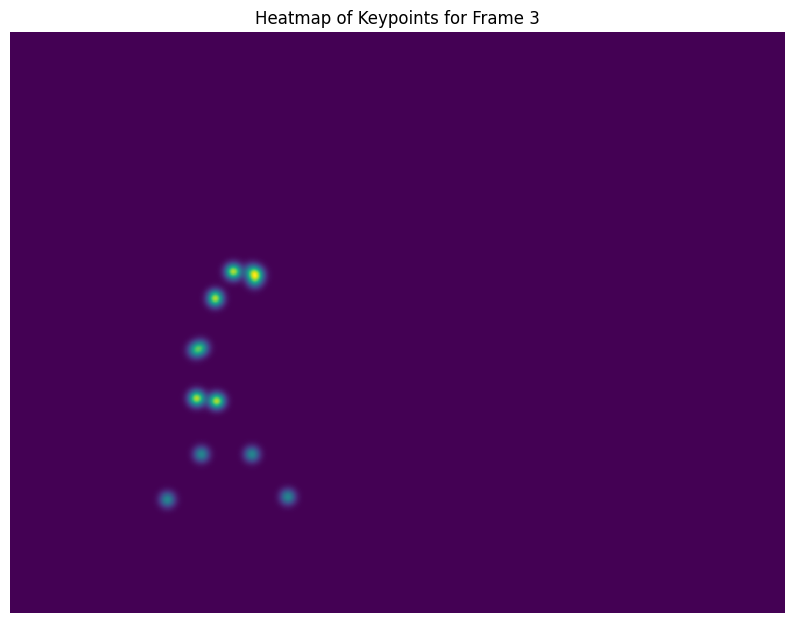

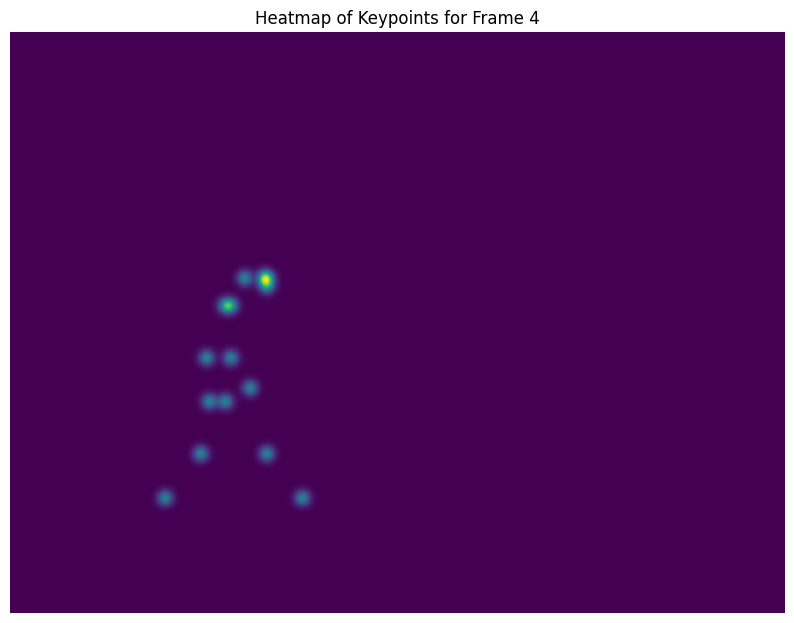

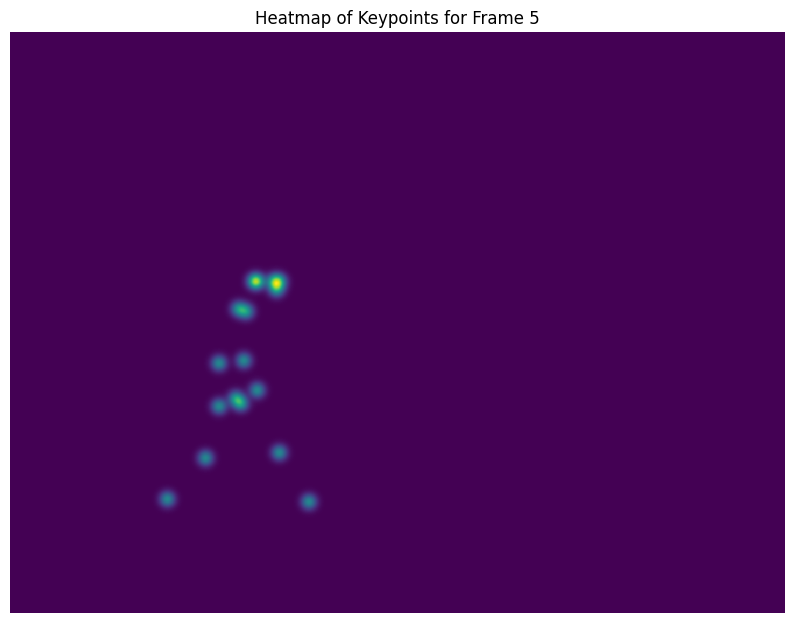

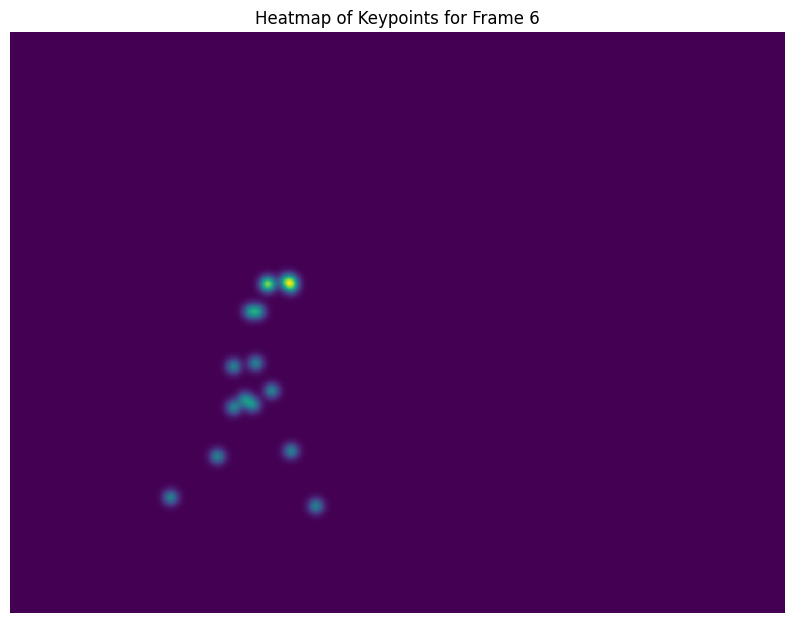

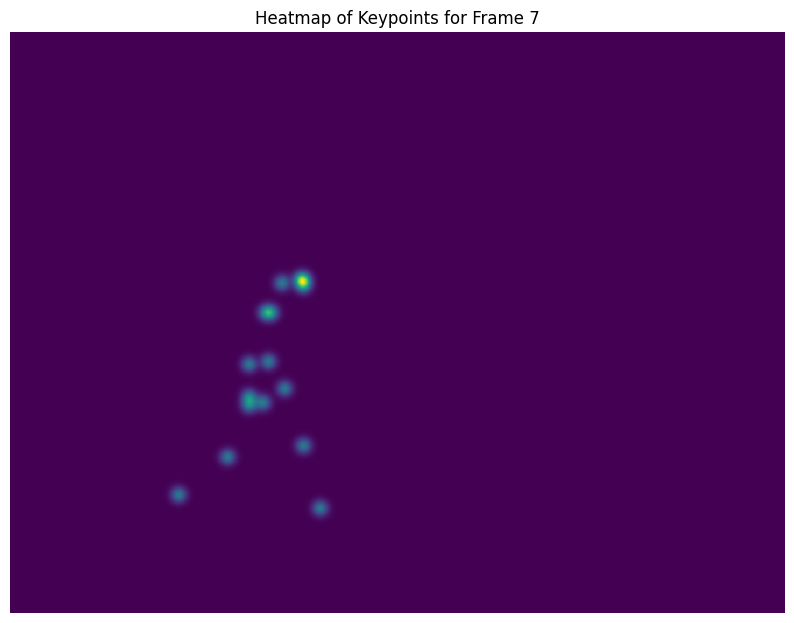

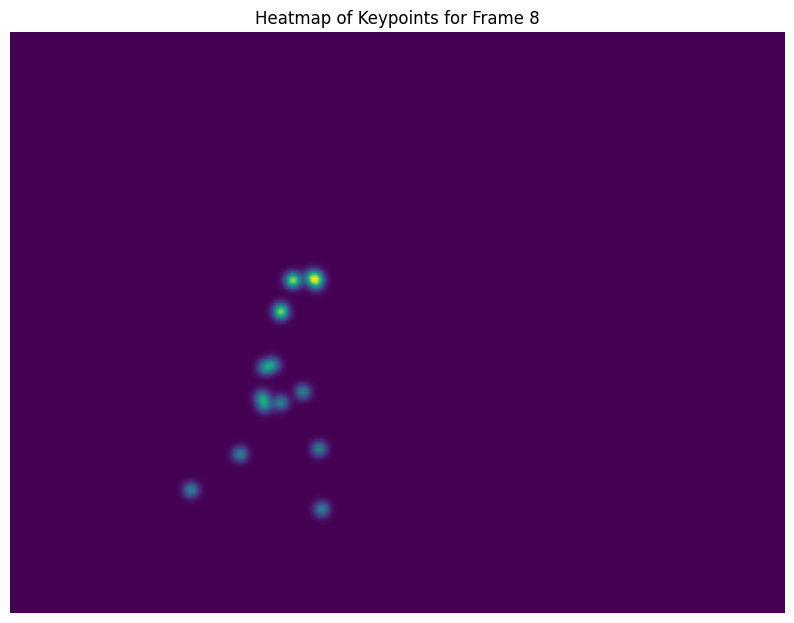

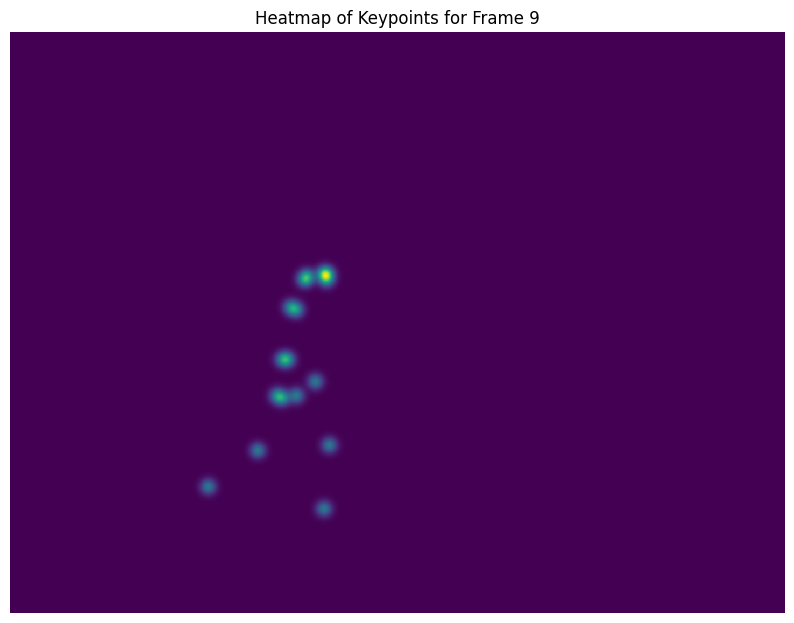

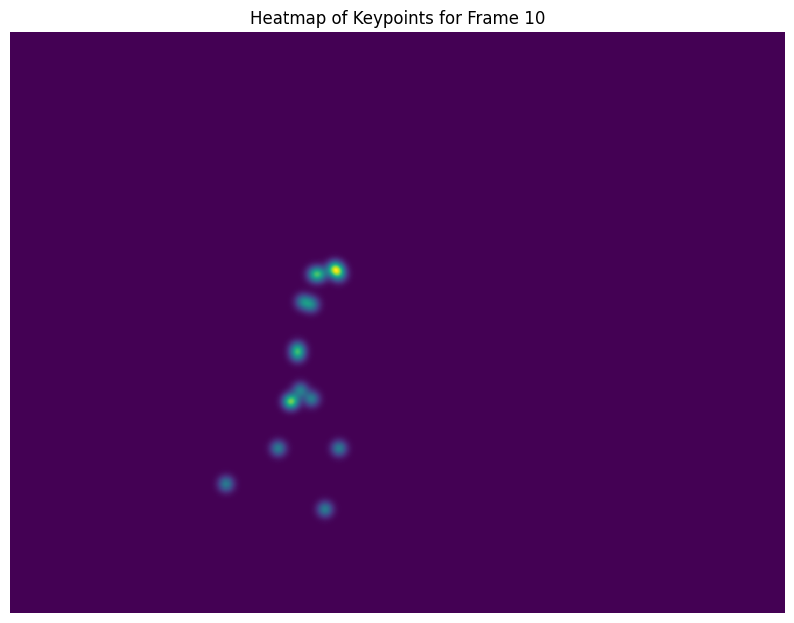

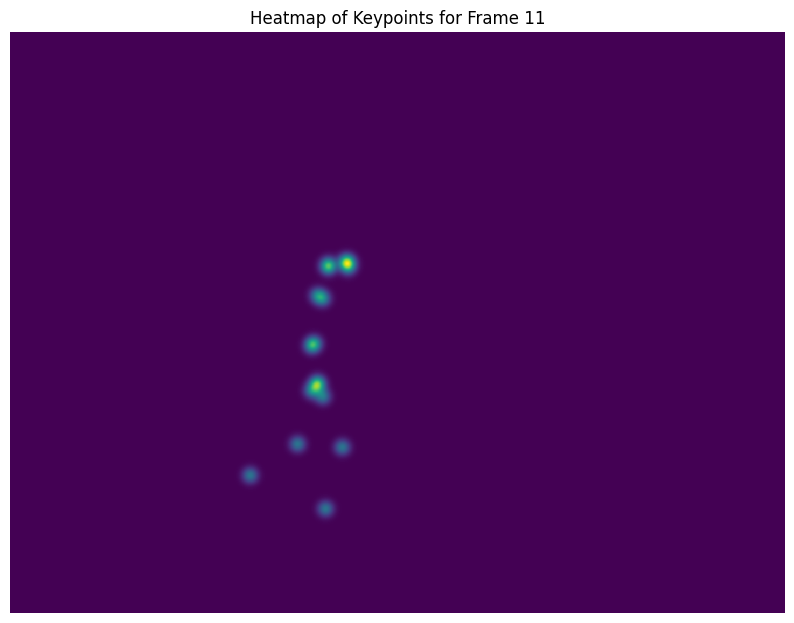

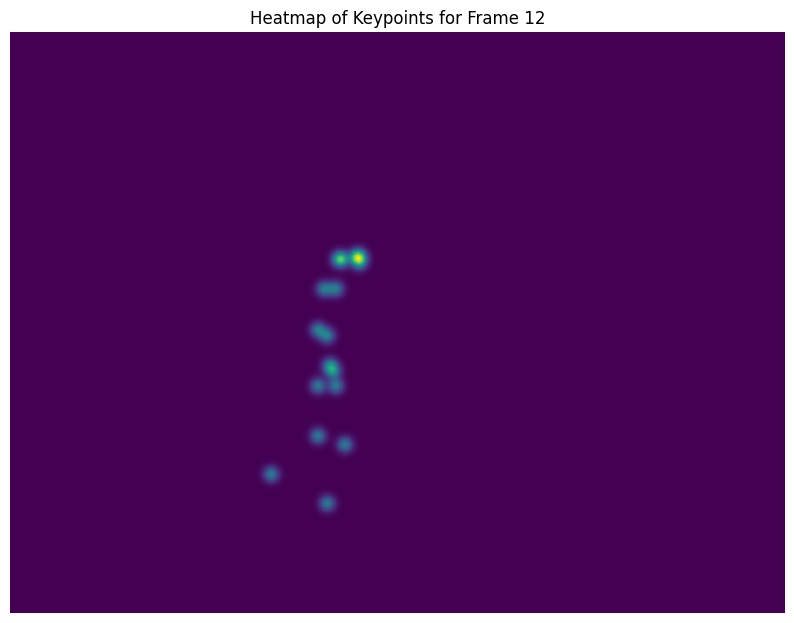

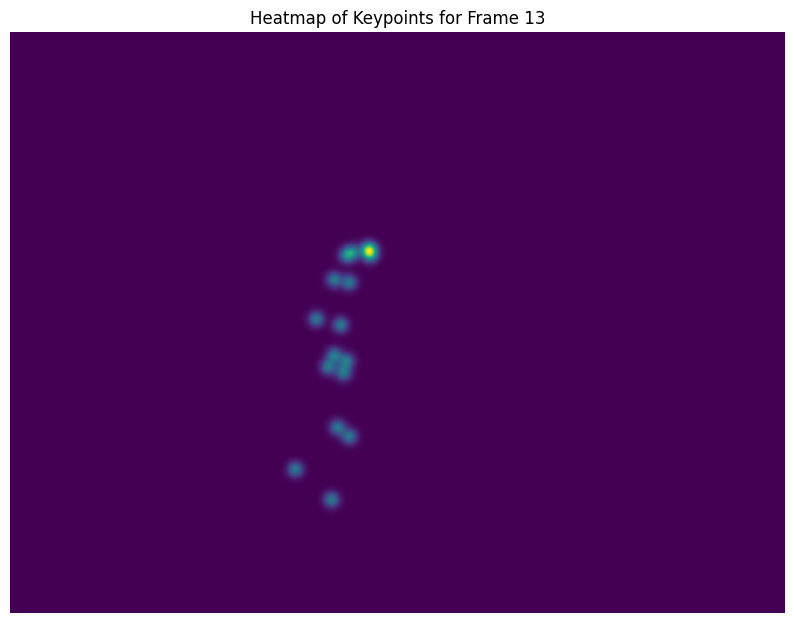

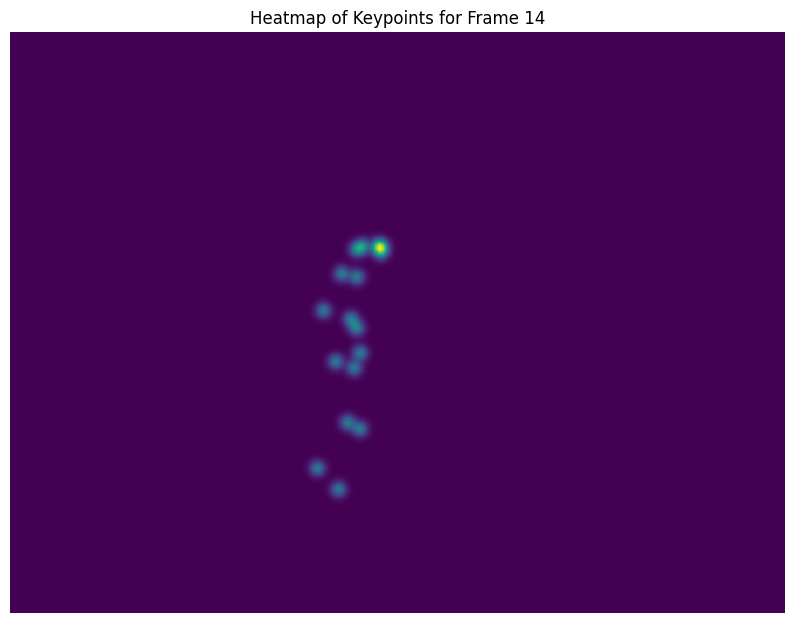

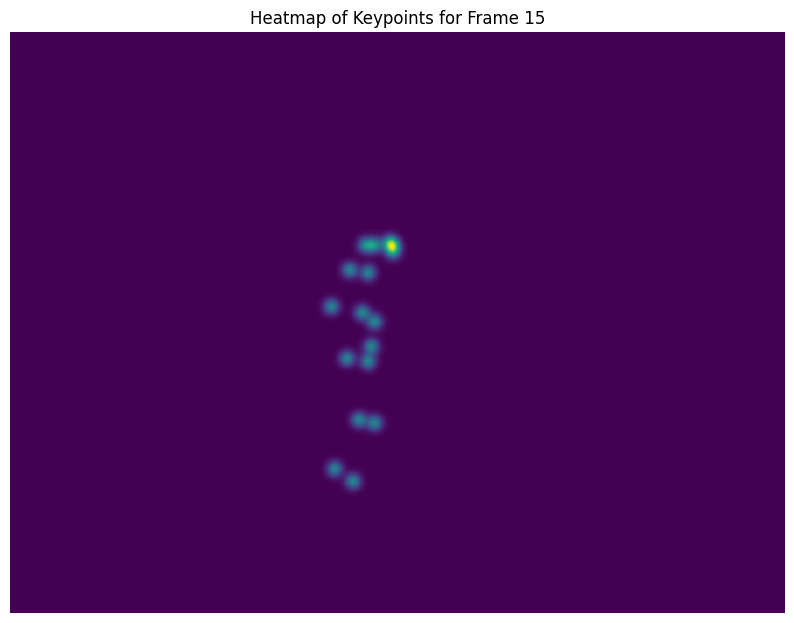

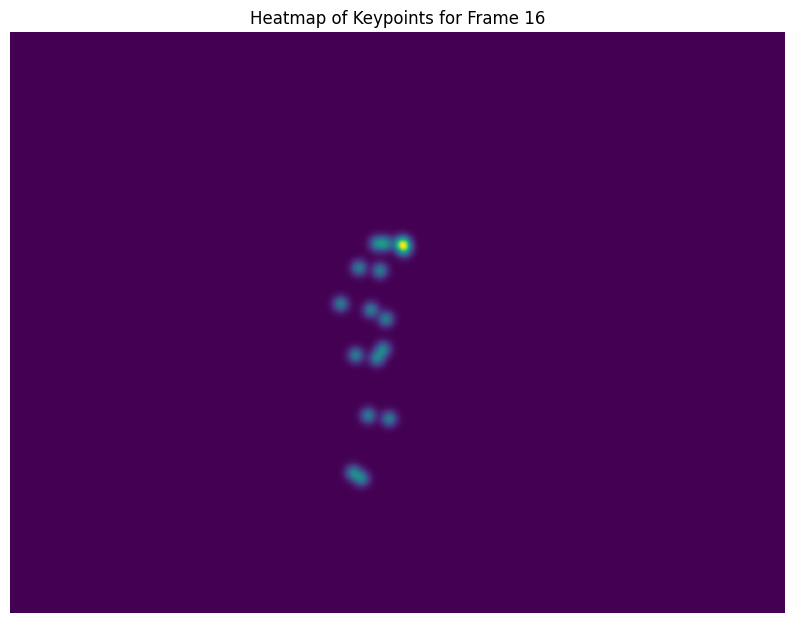

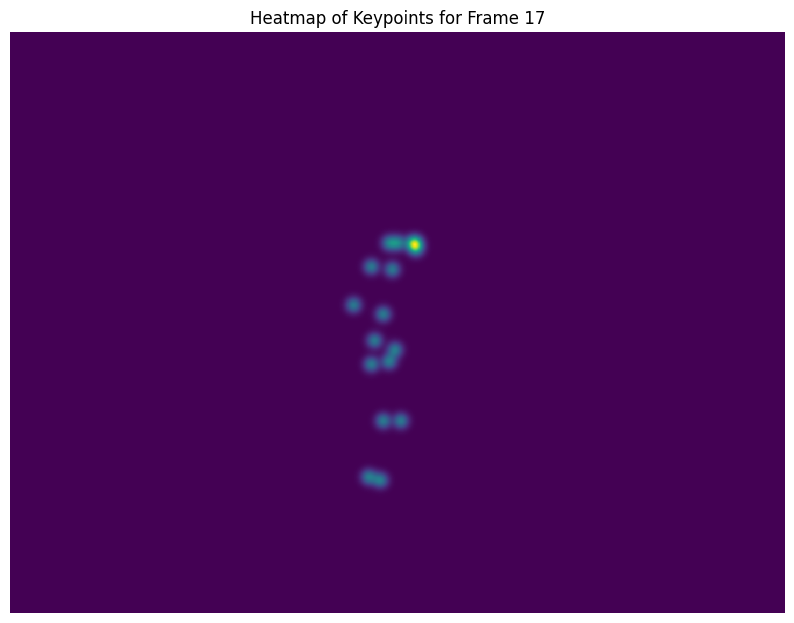

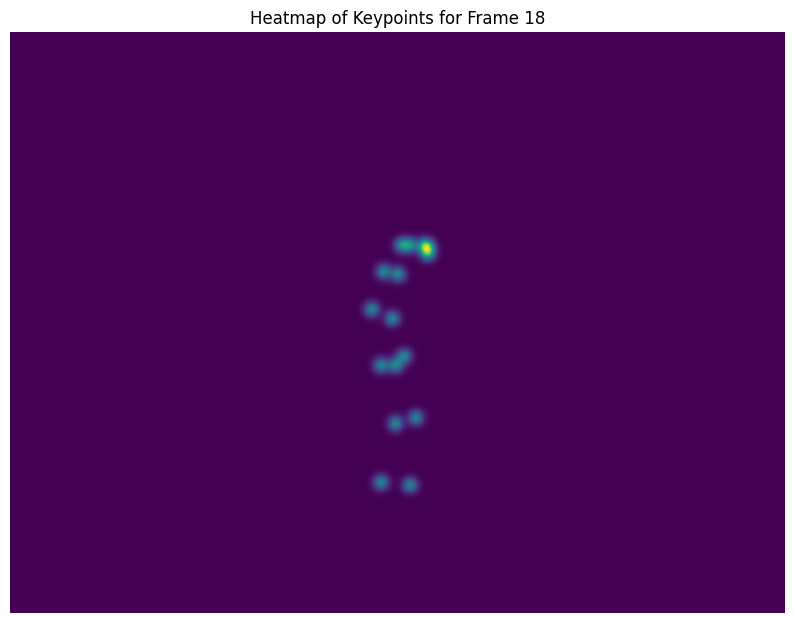

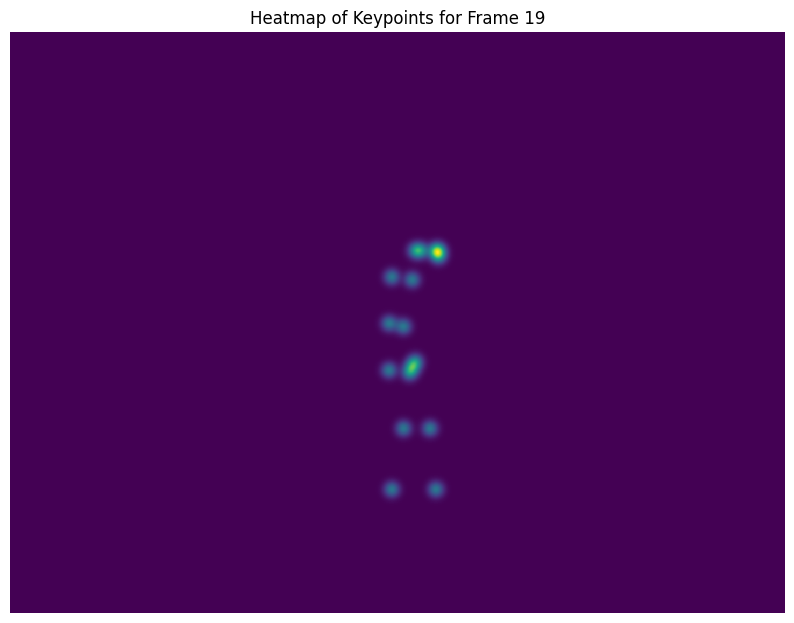

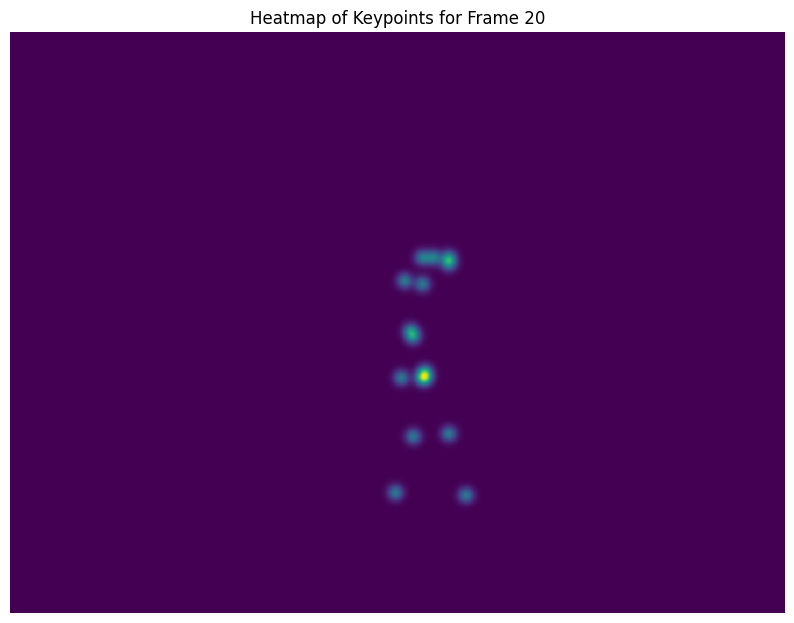

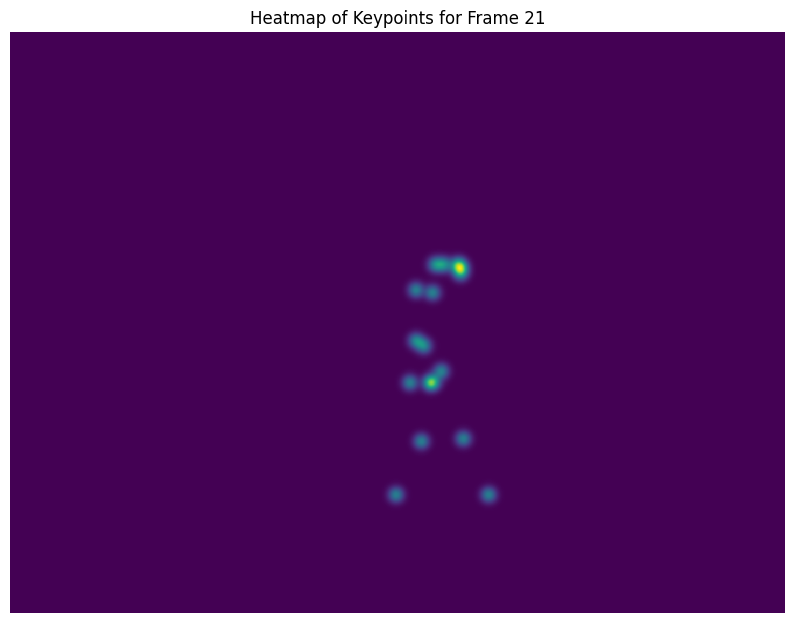

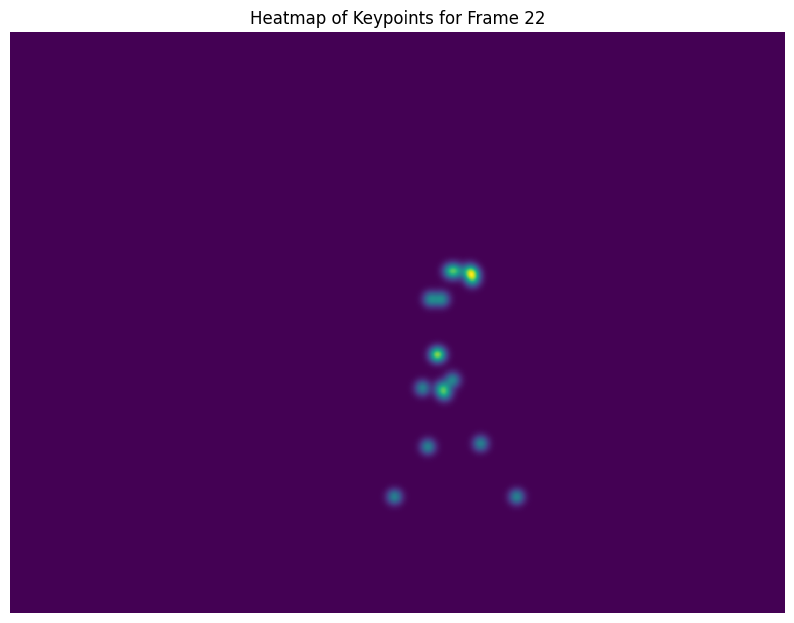

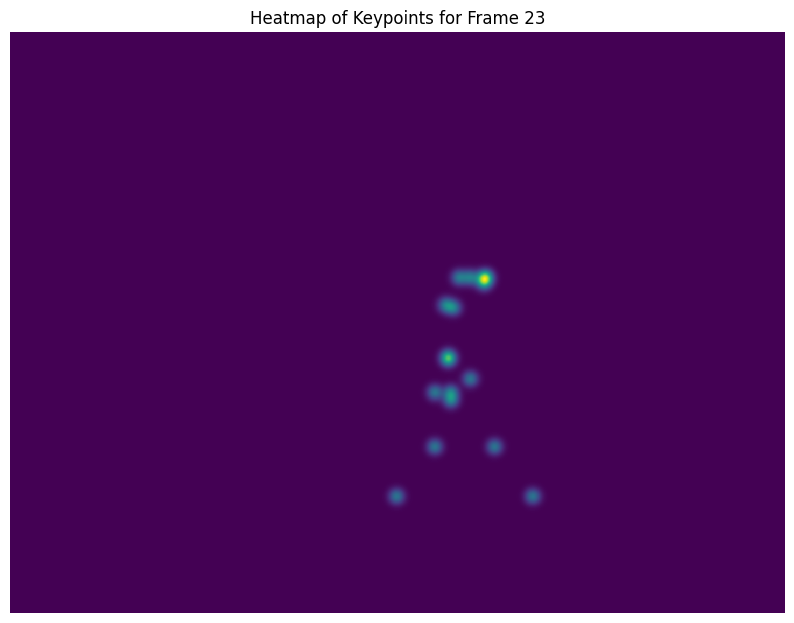

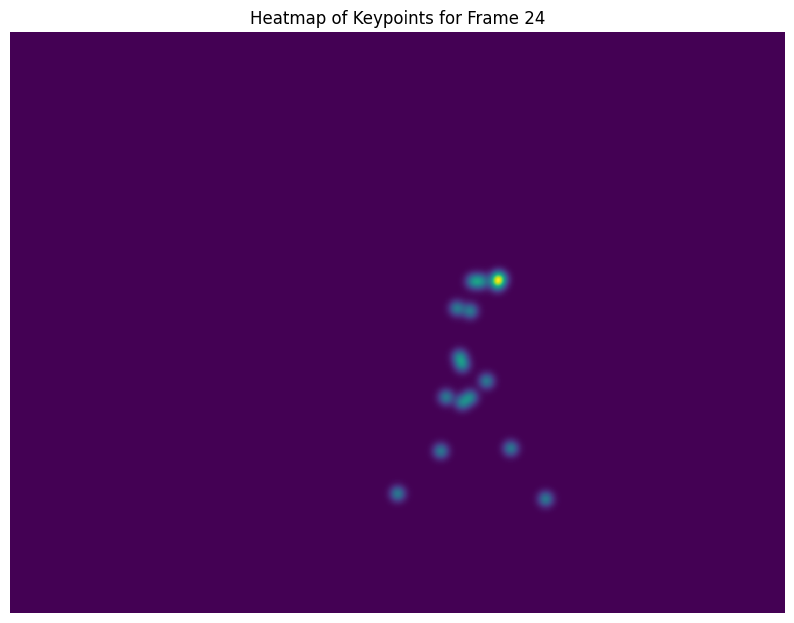

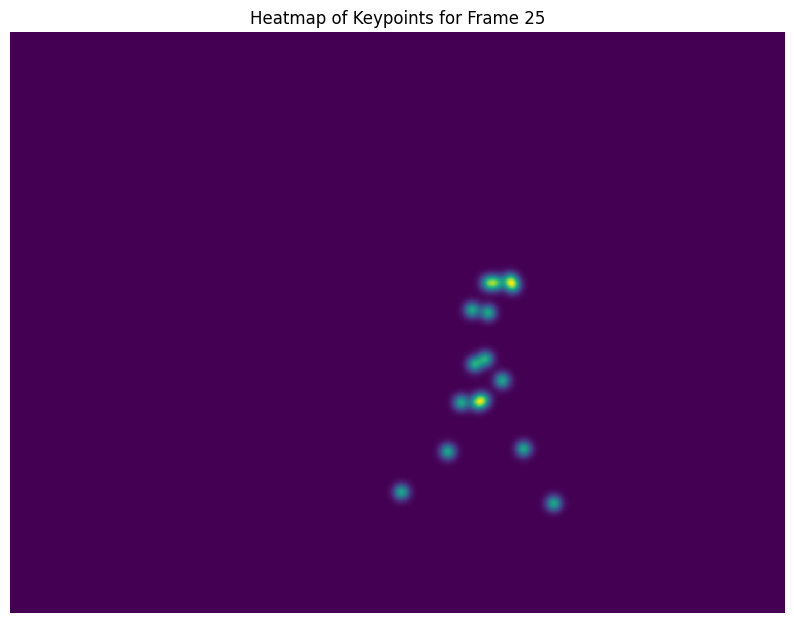

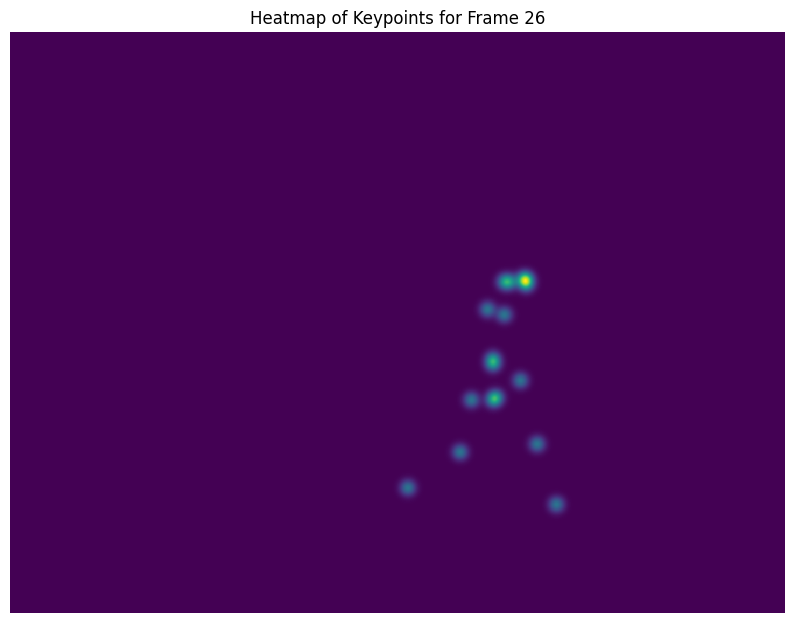

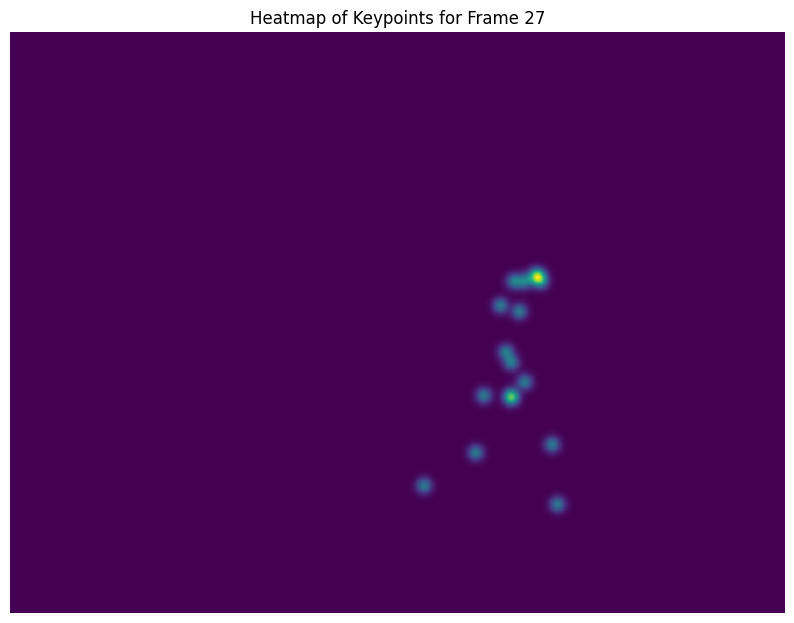

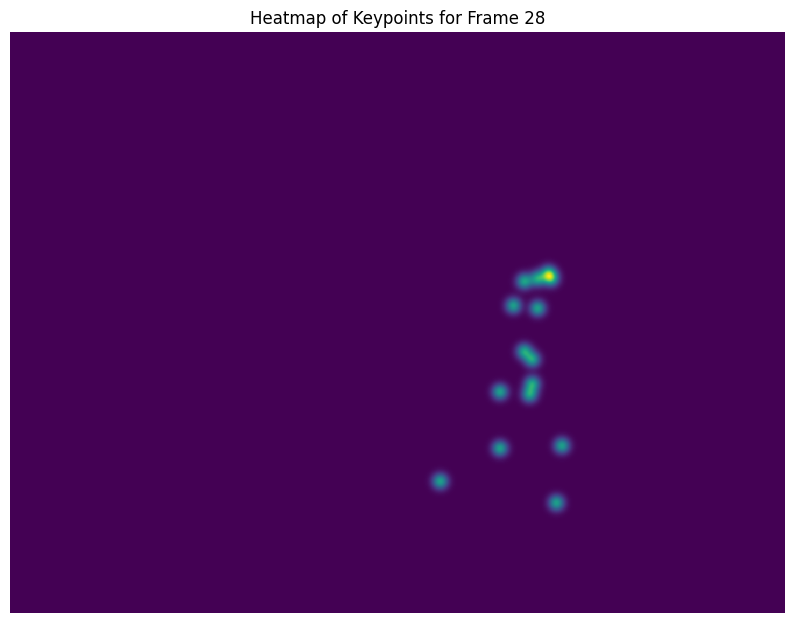

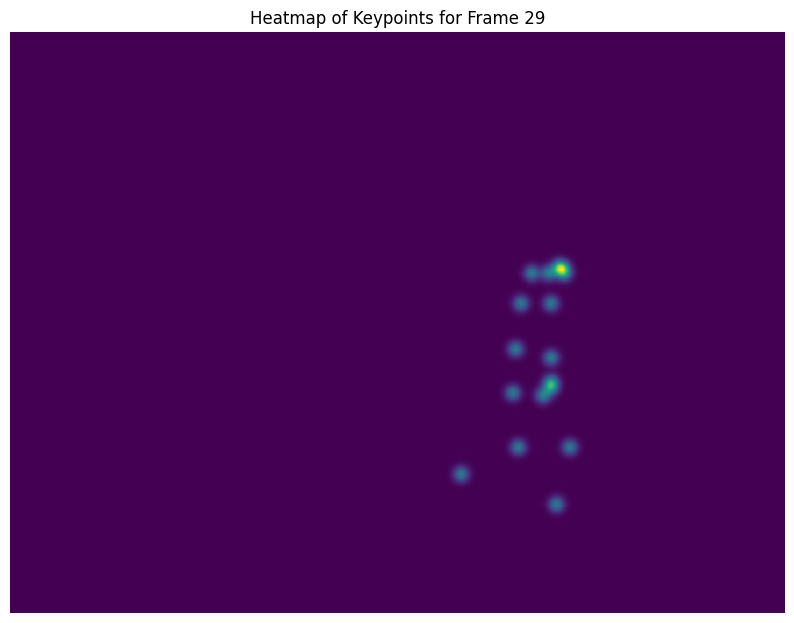

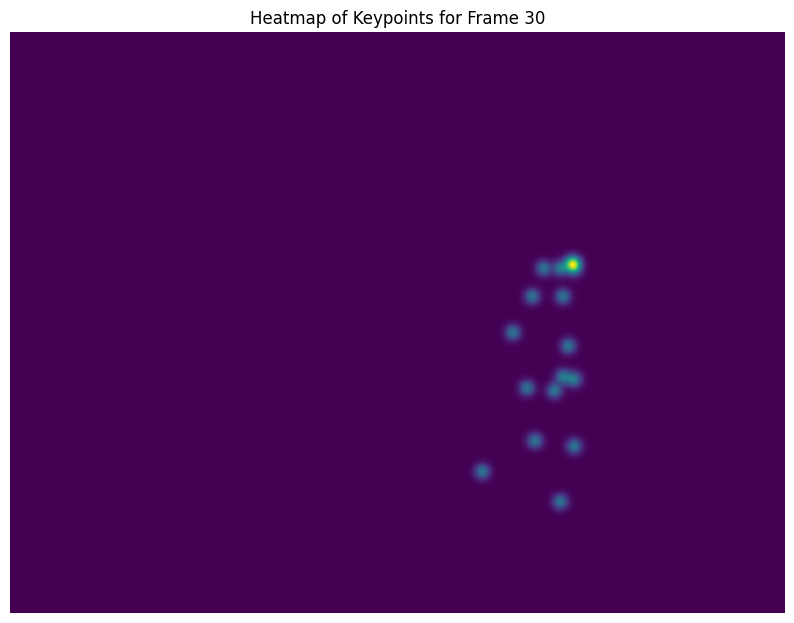

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

for frame_index in range(len(pkl_data['keypoint'][0])):
    keypoints = pkl_data['keypoint'][0][frame_index]  


    heatmap = np.zeros(pkl_data['img_shape'][:2])


    spread = 10  
    for joint in keypoints:
        x, y = int(joint[0]), int(joint[1])  
        if 0 <= x < heatmap.shape[1] and 0 <= y < heatmap.shape[0]:
            heatmap[y, x] = 1  


    heatmap_blurred = gaussian_filter(heatmap, sigma=spread)


    heatmap_normalized = heatmap_blurred / heatmap_blurred.max()


    plt.figure(figsize=(10, 10))
    plt.imshow(heatmap_normalized, interpolation='nearest')
    plt.title(f'Heatmap of Keypoints for Frame {frame_index + 1}')
    plt.axis('off')
    plt.show()